# Futuristic Controversies and Topics on Reddit

### Research Question:

To find out about the variation in popularity for different topics of conversation, and to hence compare the differences in metrics of "hot" posts with "controversial" posts as categorized by Reddit.  

### Operationalisation of concepts:

"Popularity" may be subjective to define. We may use "user engagement" instead as that will be a better framework considering the variables used in this study. For this comparative study, we will use 100 posts from "hot" posts and 100 posts from "controversial" posts of r/Futurology (which contains discourse related to the study of the future).

### Unit of Analysis: 

For this study, we may attribute various topics to the flairs of the posts, while we may define popularity through looking at metrics such as "scores" of posts belonging to different topics, along with number of comments, and number of awards given.
Hence, we will look at the same metrics for "hot" posts and "controversial" posts to give a comparison.

### Variables of Interest:

For each of the posts, we will look at the following:

- Number of Comments
- Score (No. of Upvotes (minus) No. of Downvotes)
- No. of awards given
- Flair of Post 

### Please find limitations and challenges of this study towards the end of this notebook.

In [1]:
## importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json 
import pandas as pd
import requests

## defining the variables for our study

subreddit = 'Futurology'
limit = 100
timeframe = 'month' 
listing = 'hot' 
listing2= 'controversial'

## parsing the link to get data in json

def get_reddit(subreddit,listing,limit,timeframe):
    for i in listing:
            
        try:
            base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
            request = requests.get(base_url, headers = {'User-agent': 'Khyati'})
        except:
            print('An Error Occured')
    return request.json()
 
## extracting the post titles

def get_post_titles(r):
    posts = []
    for post in r['data']['children']:
        x = post['data']['title']
        posts.append(x)
    return posts

## get dataframe containing relevant columns

def get_results(r):
    myDict = {}
    for post in r['data']['children']:
        myDict[post['data']['title']] = {'flair':post['data']['link_flair_text'],'comments':post['data']['num_comments'],'score': post['data']['score'], 'awards': post['data']['total_awards_received']}
    df = pd.DataFrame.from_dict(myDict, orient='index')
    return df

## get 'hot' and 'controversial' dataframes

if __name__ == '__main__':
    r = get_reddit(subreddit,listing,limit,timeframe)
    df1 = get_results(r)
    q = get_reddit(subreddit, listing2, limit, timeframe)
    df = get_results(q)

In [2]:
## creating deep copies of the dataframe 

df_hot = df1.copy()
df_controversial = df.copy()

In [3]:
## grouping by mean of each column

df_hot_mean = df_hot.groupby('flair').agg('mean')
df_controversial_mean = df_controversial.groupby('flair').agg('mean')

## collating the dataframes with means

summary_df_mean = pd.concat([df_hot_mean, df_controversial_mean], axis=1, keys = ['Hot', 'Controversial']).fillna(0)
summary_df_mean = summary_df_mean.reset_index()

In [4]:
## grouping by total count of each column

df_hot_sum = df_hot.groupby('flair').agg(sum)
df_controversial_sum = df_controversial.groupby('flair').agg(sum)

## collating the dataframes with sum (total count)

summary_df_sum = pd.concat([df_hot_sum, df_controversial_sum], axis=1, keys = ['Hot', 'Controversial']).fillna(0)
summary_df_sum = summary_df_sum.reset_index()

## Figure 1

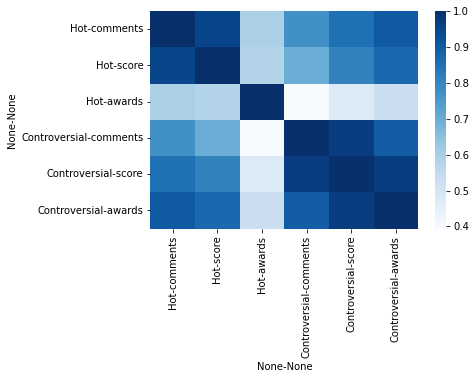

In [5]:
import seaborn as sns
cor_sum = summary_df_sum.corr()
sns.heatmap(cor_sum, annot=False, cmap = 'Blues')
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

## Figure 2

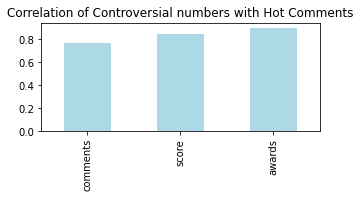

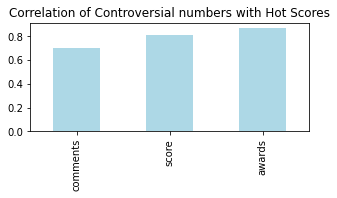

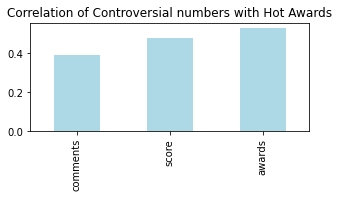

In [14]:
correlation1 = summary_df_sum['Controversial'].corrwith(summary_df_sum['Hot','comments'])
correlation1.plot.bar(title='Correlation of Controversial numbers with Hot Comments', color ="lightblue")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()

correlation2 = summary_df_sum['Controversial'].corrwith(summary_df_sum['Hot','score'])
correlation2.plot.bar(title='Correlation of Controversial numbers with Hot Scores', color ="lightblue")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()

correlation3 = summary_df_sum['Controversial'].corrwith(summary_df_sum['Hot','awards'])
correlation3.plot.bar(title='Correlation of Controversial numbers with Hot Awards', color ="lightblue")
plt.rcParams["figure.figsize"] = (5,2)
plt.show()

## Figure 3

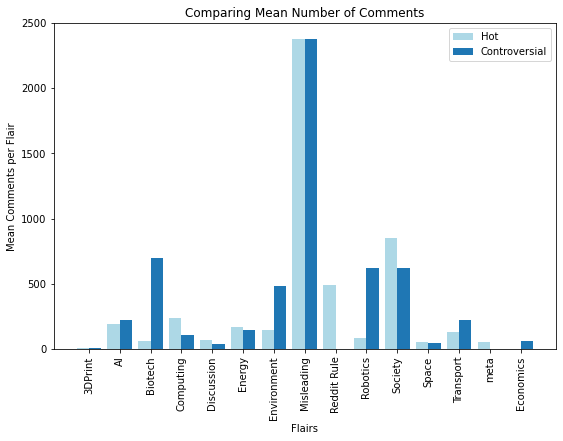

In [12]:
X_axis = np.arange(len(summary_df_mean['flair']))
plt.bar(X_axis - 0.2, summary_df_mean['Hot', 'comments'], 0.4, label = 'Hot', color='lightblue')
plt.bar(X_axis + 0.2, summary_df_mean['Controversial','comments'], 0.4, label = 'Controversial')
  
plt.xticks(X_axis, summary_df_mean['flair'], rotation=90)
plt.xlabel("Flairs")
plt.ylabel("Mean Comments per Flair")
plt.title("Comparing Mean Number of Comments")
plt.rcParams["figure.figsize"] = (9,6)
plt.legend()
plt.show()

## Figure 4

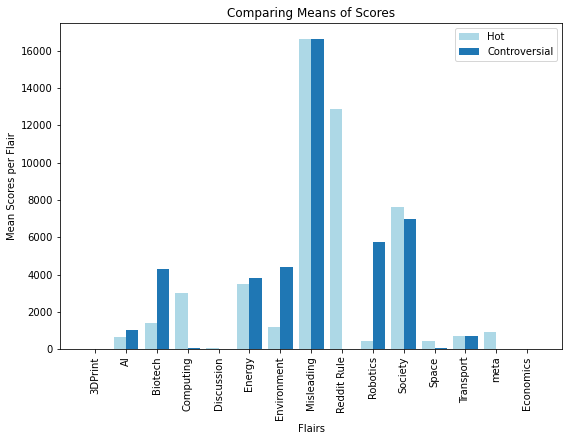

In [8]:
X_axis = np.arange(len(summary_df_mean['flair']))
plt.bar(X_axis - 0.2, summary_df_mean['Hot', 'score'], 0.4, label = 'Hot', color='lightblue')
plt.bar(X_axis + 0.2, summary_df_mean['Controversial','score'], 0.4, label = 'Controversial')
  
plt.xticks(X_axis, summary_df_mean['flair'], rotation=90)
plt.xlabel("Flairs")
plt.ylabel("Mean Scores per Flair")
plt.title("Comparing Means of Scores")
plt.rcParams["figure.figsize"] = (9,6)
plt.legend()
plt.show()

## Table 1

In [34]:
comparing_scores = df_hot_mean - df_controversial_mean
display(comparing_means.fillna(0).reset_index().sort_values(by='score', ascending=False))

,flair,comments,score,awards
3,Computing,135.111111,2942.111111,0.555556
11,Society,228.316667,639.350000,0.100000
12,Space,6.607143,359.357143,0.000000
4,Discussion,30.333333,30.333333,0.000000
0,3DPrint,0.000000,1.000000,0.000000
5,Economics,0.000000,0.000000,0.000000
9,Reddit Rule,0.000000,0.000000,0.000000
14,meta,0.000000,0.000000,0.000000
8,Misleading,0.000000,-4.000000,0.000000
13,Transport,-96.400000,-18.600000,0.000000


In [54]:
diff_mean_score = (np.mean(df_controversial['score'])) - (np.mean(df_hot['score']))
diff_sum_com = (sum(df_controversial['comments'])) - (sum(df_hot['comments']))
diff_mean_com = (np.mean(df_controversial['comments'])) - (np.mean(df_hot['comments']))
diff_sum_score = (sum(df_controversial['score'])) - (sum(df_hot['score']))
sum_controversial_score = sum(df_controversial['score'])
mean_controversial_score = np.mean(df_controversial['score'])

print(f" Controversial sum of scores is {round((diff_sum_score)/(sum_controversial_score)*100)} % higher than that of Hot listing's sum of scores. \n\
Controversial mean of scores is {round((diff_mean_score/mean_controversial_score)*100)} % higher than that of Hot listing's mean of scores")

 Controversial sum of scores is 29 % higher than that of Hot listing's sum of scores. 
Controversial mean of scores is 30 % higher than that of Hot listing's mean of scores


# Findings

- Checking the general correlation between all available parameters:


In Figure 1, we plot a heatmap to visualise which "Hot" factor correlates highest with the corresponding "Controversial" factor.

In general, there is a positive correlation between all factors, i.e., for example, as the number of comments of 'Hot' posts increases, an increase in the number of comments of 'Controversial' posts also increased. 

- Checking for individual correlation pattern for 'Controversial' df metrics with 'Hot' metrics:


In Figure 2, we find that interestingly, correlation is generally maximum for 'Awards', second highest for 'Scores' and least for 'Comments' (in increasing order).

This could be because Reddit's algorithm might use no. of comments as a highly weighted factor to distinguish between "Hot" and "Controversial" topics, due to which we see minimum correlation for comments (lower than other factors, although still quite high). 

- Plotting the means of the two comparative dataframes to visualise any patterns:


In general, we see that there are more flair topics in which the mean post score is higher for 'Controversial' posts (Figure 4). 
While plotting the means of scores and comments of different flairs in Hot and Controversial posts, we see almost a normal distribution pattern (Central Limit Theorem? {although sample size is much lower than 30} ). 

Overall, it is also interesting to see that 'Misleading' flair has highest scores and comments in each section. It is possibly the flair topic which attracts a large traction on this sub-reddit. 

- Comparing flair topics by ranking them by their scores:


In Table 1, we see that there are 8 flairs which rank higher in Controversial mean scores- Robotics, Environment, Biotech, AI, Energy, Transport and Misleading. On the other hand, there are only 5 flairs that have a higher mean score for 'Hot' topics. 

We may conclude that 'Controversial' topics generally tend to have more upvotes. This was further investigated by finding that Controversial topics had ~30% higher scores than Hot listed topics. 


# Limitations/ Challenges

- 100 posts from each listing of the sub-reddit may not be sufficient data to make claims about Reddit's listing patterns or about the Sub-Reddit, although some of the findings show interesting patterns that can be further investigated with larger datasets. 

- 'Controversial' topics may be categorized by Reddit through the Polarity and Subjectivity scores of comments/text on reddit. These scores were not accounted for in this study. 

- Although correlation was calculated, there is no means to establish direction or relevance without analysing deeper into the text of the posts. 

- Maybe looking into more columns with a time dimension of posts, as well as content of comments would allow us to better understand the data and Reddit's motivation to list posts in either "Controversial" or "Hot".